In [15]:
import pandas as pd
import numpy  as np
from datetime import datetime, date
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

In [16]:
import plotly.express as px 
import plotly.graph_objects as go

In [17]:
# Visualização
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import *

In [18]:

import seaborn as sns
import cufflinks as cf
from plotly.offline import plot, iplot
import plotly.offline as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.express as px
import plotly.subplots as sp


In [19]:
#from datetime import datetime
from dateutil.relativedelta import relativedelta

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:


# Carregar o arquivo Excel
xls = pd.ExcelFile('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx')

# Obter os nomes das abas
sheet_names = xls.sheet_names

# Para cada aba, ler o schema e as primeiras 10 linhas
for sheet in sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet, nrows=10)
    # print(f"Schema para {sheet}:")
    # print(df.dtypes)
    # print(f"Primeiras 10 linhas para {sheet}:")
    # print(df.head(10))


import openpyxl

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de transações
ws = wb['Transações']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_t = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_t.columns:
    # Se o tipo de dados da coluna é object (string)
    if df_t[col].dtype == 'object':
        # Remova os espaços em branco no início e no final
        df_t[col] = df_t[col].str.strip()

df_t['Promo'] = df_t['Promo'].astype(str)
cols = [col for col in df_t.columns if 'ID' not in col]
null_counts = df_t.isnull().sum()

![dbc](dbc.jpg)
![renner](renner.jpg)

# Análise da base de dados Exercicio_Python_CRM .xlsx 

##### Primeira parte da análise:
- análise descritiva da base de Transações
- agregação Ano e Mês
- KPI Ticket Médio
###### nesta primeira parte da análise é possível verificar que:
- a base apenas possui dados para 01-2022 até 09-2022 e depois 01-2023 até 09-2023 faltando o último trimestre dos dois anos; época de Natal, black friday e dia das crianças!
- as vendas de 2023 apenas se recuperaram no terceiro trimestre. É provável que esta recuperação continuasse no terceiro semestre indicando uma tendência de crescimento ao longo do ano, o que não acontece em 2022.
- 2022 teve um pico em Março (semana do consumidor), mas houve um decréscimo em junho (dia dos namorados). Em 2023 parece que houve uma venda melhor relacionada ao calendário de junho.
- o ano de 2023 teve menos promoções e menos Unidades vendidas em relação a 2022, porém obteve um Valor Total maior indicando que houve um Ticket Médio maior em 2023 em relação a 2022
- o Ticket Médio de 2023 foi sempre maior que 2022 no agregado mês a mês
 

In [22]:
import plotly.io as pio

In [23]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Trans          7791 non-null   int64         
 1   Data              7791 non-null   datetime64[ns]
 2   ID_Loja           7791 non-null   int64         
 3   ID_Produto        7791 non-null   int64         
 4   ID_Cliente        7791 non-null   int64         
 5   UnidadesVendidas  7791 non-null   int64         
 6   ValorTotal        7791 non-null   float64       
 7   Promo             7791 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 487.1+ KB


In [24]:
# Definindo a paleta de cores Pastel2
pastel2 = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']

In [25]:
# Criando colunas para o mês e o ano
df_t['Year'] = df_t['Data'].dt.year
df_t['Month'] = df_t['Data'].dt.month

In [26]:

# Agrupando os dados por ano e mês
grouped = df_t.groupby(['Year', 'Month'])[['ValorTotal', 'UnidadesVendidas']].sum().reset_index()

In [27]:
# # Criando a figura
# fig = go.Figure()

# # Adicionando o gráfico de barras para 'ValorTotal'
# for i, year in enumerate(grouped['Year'].unique()):
#     fig.add_trace(go.Bar(x=grouped[grouped['Year'] == year]['Month'], 
#                          y=grouped[grouped['Year'] == year]['ValorTotal'], 
#                          name='ValorTotal ' + str(year),
#                          marker_color=pastel2[i % len(pastel2)]))  # Use a cor correspondente da paleta

# # Adicionando o gráfico de linha para 'UnidadesVendidas'
# for i, year in enumerate(grouped['Year'].unique()):
#     line_color = '#ff0000' if year == 2023 else pastel2[(i + len(pastel2) // 2) % len(pastel2)]  # Use a cor vermelha para 2023
#     fig.add_trace(go.Scatter(x=grouped[grouped['Year'] == year]['Month'], 
#                              y=grouped[grouped['Year'] == year]['UnidadesVendidas'], 
#                              name='UnidadesVendidas ' + str(year), 
#                              yaxis='y2',
#                              line_color=line_color))

# # Configurando os eixos e a legenda
# fig.update_layout(
#     title={
#         'text': "Unidades Vendidas e Valor Total por Mês e Ano",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'}, 
#     xaxis=dict(title='Month'),
#     yaxis=dict(title='ValorTotal'),
#     yaxis2=dict(title='UnidadesVendidas', overlaying='y', side='right'),
#     autosize=False,
#     width=1200,  # Aumenta a largura da figura
#     height=500,  # Aumenta a altura da figura
#     legend=dict(
#         x=1.1,  
#         y=1,  # Posiciona a legenda no topo
#         bgcolor='rgba(255, 255, 255, 0)',  # Fundo transparente para a legenda
#         bordercolor='rgba(255, 255, 255, 0)'  # Borda transparente para a legenda
#     )
# )

# plotly.offline.plot(fig)

# # Save the figure as a .png file
# pio.write_image(fig, 'figure2.png')

In [28]:
import sys
print(sys.executable)

c:\Users\surze\anaconda3\envs\bds\python.exe


In [29]:
# Criando a figura
fig = go.Figure()

# Adicionando o gráfico de barras para 'ValorTotal'
for i, year in enumerate(grouped['Year'].unique()):
    fig.add_trace(go.Bar(x=grouped[grouped['Year'] == year]['Month'], 
                         y=grouped[grouped['Year'] == year]['ValorTotal'], 
                         name='ValorTotal ' + str(year),
                         marker_color=pastel2[i % len(pastel2)]))  # Use a cor correspondente da paleta

# Adicionando o gráfico de linha para 'UnidadesVendidas'
for i, year in enumerate(grouped['Year'].unique()):
    line_color = '#ff0000' if year == 2023 else pastel2[(i + len(pastel2) // 2) % len(pastel2)]  # Use a cor vermelha para 2023
    fig.add_trace(go.Scatter(x=grouped[grouped['Year'] == year]['Month'], 
                             y=grouped[grouped['Year'] == year]['UnidadesVendidas'], 
                             name='UnidadesVendidas ' + str(year), 
                             yaxis='y2',
                             line_color=line_color))

# Configurando os eixos e a legenda
fig.update_layout(
    title={
        'text': "Unidades Vendidas e Valor Total por Mês e Ano",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    xaxis=dict(title='Month'),
    yaxis=dict(title='ValorTotal'),
    yaxis2=dict(title='UnidadesVendidas', overlaying='y', side='right'),
    autosize=False,
    width=1200,  # Aumenta a largura da figura
    height=500,  # Aumenta a altura da figura
    legend=dict(
        x=1.1,  
        y=1,  # Posiciona a legenda no topo
        bgcolor='rgba(255, 255, 255, 0)',  # Fundo transparente para a legenda
        bordercolor='rgba(255, 255, 255, 0)'  # Borda transparente para a legenda
    )
)


fig.show()
#plotly.offline.iplot(fig)

# Save the figure as a .png file
# pio.write_image(fig, 'figure2.png')

###### - As unidades vendidas de 2023 só crescem no terceiro semestre, assim como o valor total. O comportamento é praticamente o inverso de 2022

___

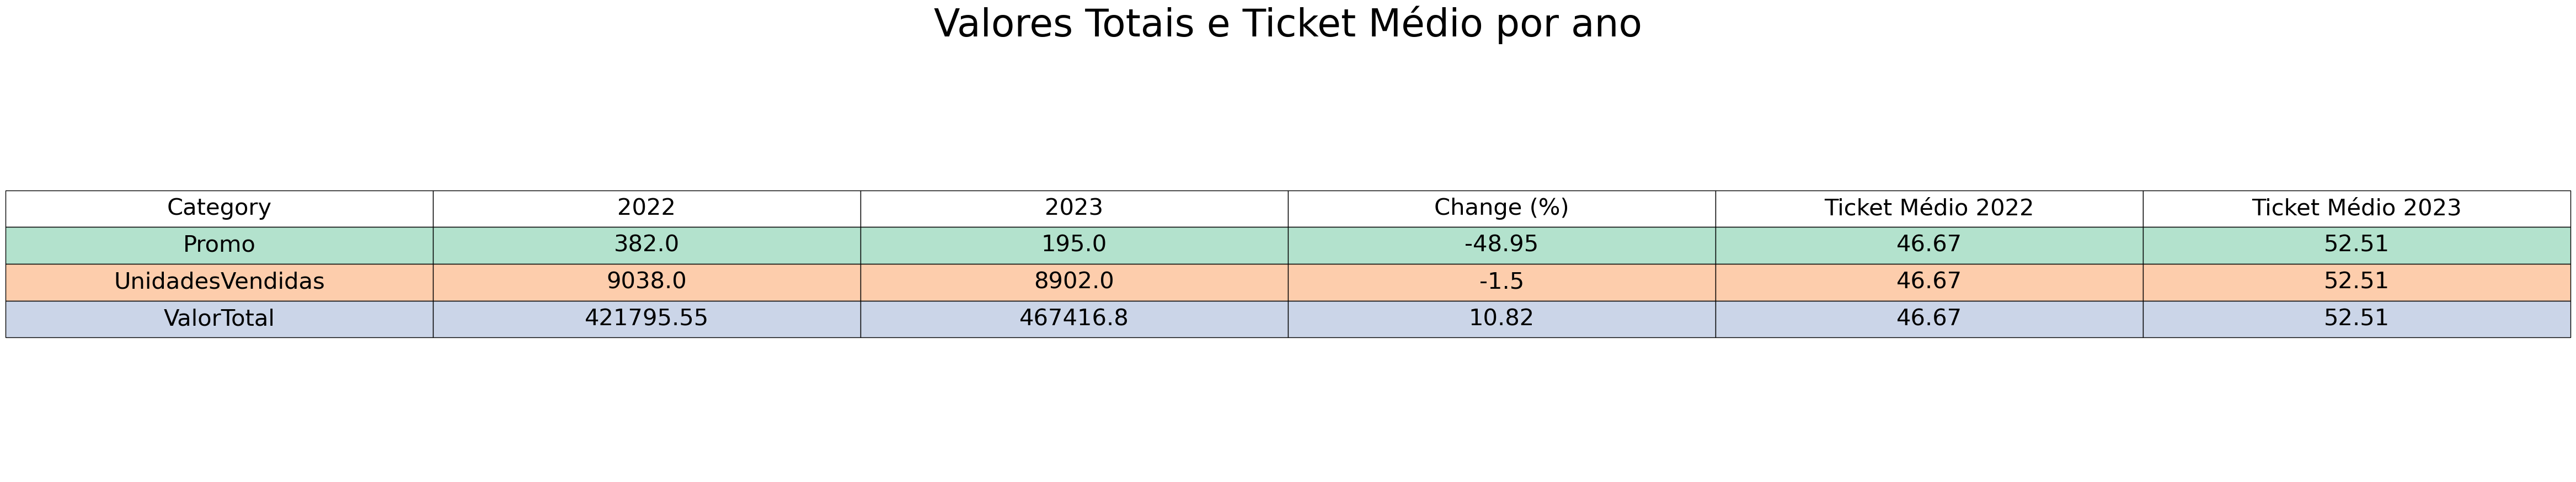

In [30]:
# Preenchendo os valores nulos na coluna 'Promo' com 0
df_t['Promo'] = df_t['Promo'].fillna(0)

# Convertendo a coluna 'Promo' para float, substituindo NaNs por 0 e depois convertendo para inteiro
df_t['Promo'] = np.nan_to_num(df_t['Promo'].astype(float)).astype(int)

# Filtrando os dados para os anos de 2022 e 2023
df_t['Year'] = df_t['Data'].dt.year
df_t['Month'] = df_t['Data'].dt.month
df_filtered = df_t[df_t['Year'].isin([2022, 2023])]

# Criando a tabela agregada
pivot = df_filtered.pivot_table(index='Month', columns='Year', values=['ValorTotal', 'UnidadesVendidas', 'Promo'], aggfunc='sum')

# Adicionando a linha com o valor total
pivot.loc['Total'] = pivot.sum()

# Extraindo a linha 'Total'
total_values = pivot.loc['Total']

# Transpondo a série para um DataFrame e resetando o índice
total_df = total_values.transpose().reset_index()

# Renomeando as colunas
total_df.columns = ['Category', 'Year', 'Value']

# Pivotando o DataFrame
pivot_total = total_df.pivot(index='Category', columns='Year', values='Value')

# Calculando a mudança percentual
pivot_total['Change (%)'] = (pivot_total[2023] - pivot_total[2022]) / pivot_total[2022] * 100

pivot_total['Ticket Médio 2022'] = pivot_total[2022]['ValorTotal'] / pivot_total[2022]['UnidadesVendidas']
pivot_total['Ticket Médio 2023'] = pivot_total[2023]['ValorTotal'] / pivot_total[2023]['UnidadesVendidas']

import matplotlib.pyplot as plt

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 10))

# Add a title to the plot
ax.set_title('Valores Totais e Ticket Médio por ano', fontsize=50, pad=20)

# Rest of your code...
# Adicionando a tabela à figura
table_data = pivot_total.reset_index().round(2).values.tolist()
column_labels = pivot_total.reset_index().columns.tolist()

# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(30)  # Increase this value to increase the font size

# Aumentando a largura e altura geral da tabela
table.scale(4, 4)  # Increase the second value to increase the height of the rows

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(30)  # Increase this value to increase the font size of the headers

# Ajustando o tamanho da fonte da coluna 'DescProduto'
for key, cell in table.get_celld().items():
    if key[1] == 0:  # 0 é o índice da coluna 'DescProduto'
        cell.set_fontsize(30)  # Increase this value to increase the font size of the 'DescProduto' column
# Escondendo os eixos
ax.axis('off')

plt.show()
# Salvando a figura como .png
#plt.savefig('pivot_total_table.png')


In [31]:
pivot

Promo        UnidadesVendidas          ValorTotal             
Year    2022   2023             2022    2023        2022         2023
Month                                                                
1       39.0   17.0           1014.0   829.0   48038.830   42374.9645
2       31.0   28.0            725.0   744.0   33487.866   37752.1970
3       62.0   25.0           1455.0  1023.0   67337.112   54805.5775
4       37.0   15.0           1034.0   886.0   48180.612   45134.3005
5       45.0   20.0           1077.0   914.0   51761.596   46058.3785
6       26.0   16.0            715.0  1213.0   33658.754   64254.3245
7       48.0   23.0           1044.0  1079.0   48442.970   58027.6275
8       59.0   23.0           1126.0   968.0   50768.534   53043.2705
9       35.0   28.0            848.0  1246.0   40119.278   65966.1620
Total  382.0  195.0           9038.0  8902.0  421795.552  467416.8025

###### 
###### - praticamente metade das promoções em 2023 em relação a 2022
###### - queda nas unidades vendidas de 1,5% em 2023 em relação a 2022
###### - Aumento de faturamento - Valor Total de 10,82% em 2023 em relação a 2022
###### - Aumento do Ticket Médio em 2023 em relação a 2022

___

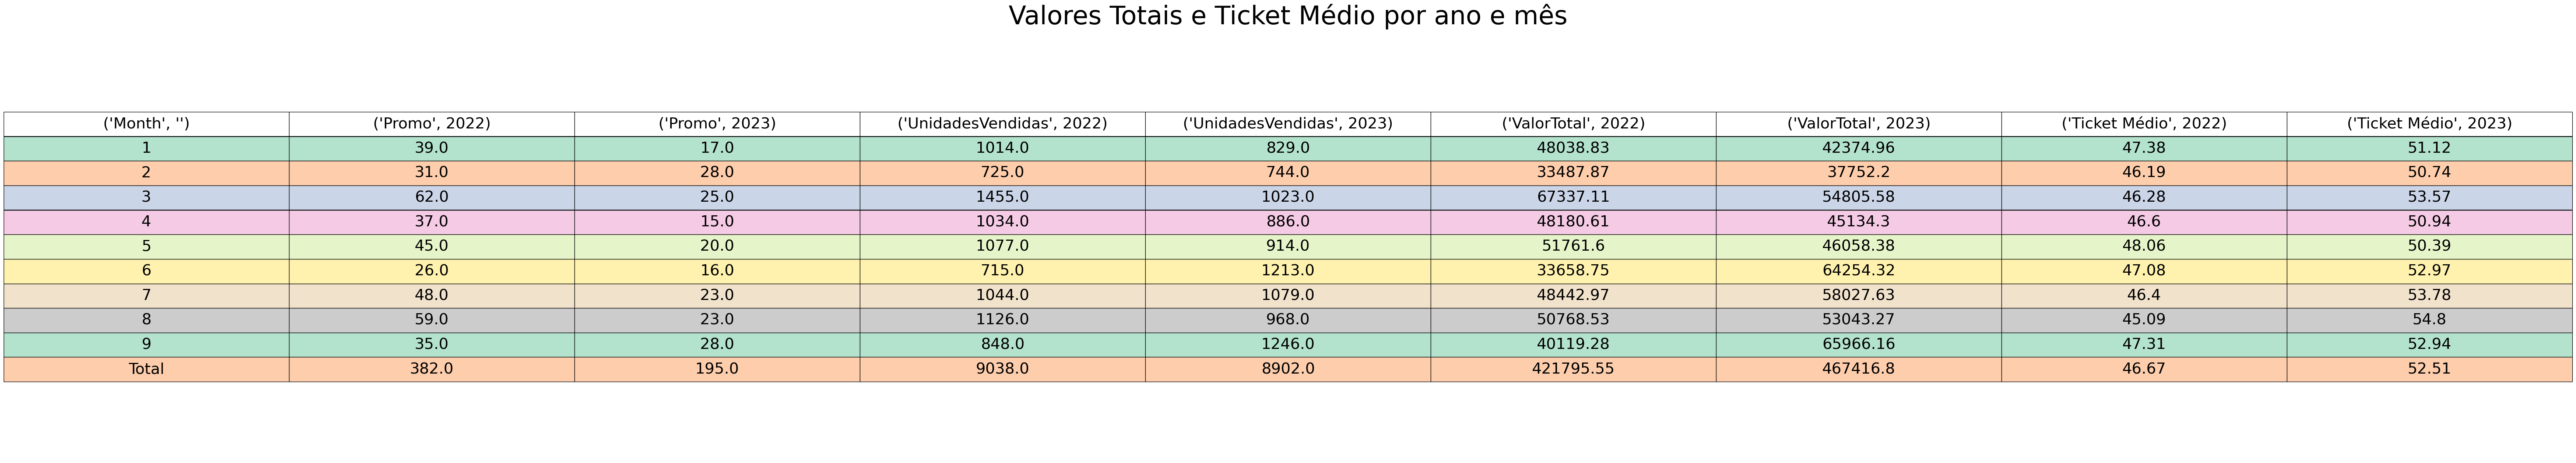

In [32]:
# 'Ticket Médio' para 2022 and 2023
pivot[('Ticket Médio', 2022)] = pivot[('ValorTotal', 2022)] / pivot[('UnidadesVendidas', 2022)]
pivot[('Ticket Médio', 2023)] = pivot[('ValorTotal', 2023)] / pivot[('UnidadesVendidas', 2023)]


# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(20, 15))  # Aumentando a largura da figura

# Add a title to the plot
ax.set_title('Valores Totais e Ticket Médio por ano e mês', fontsize=50, pad=20)

# Adicionando a tabela à figura
table_data = pivot.reset_index().round(2).values.tolist()  # Arredondando os valores para 2 casas decimais
column_labels = pivot.reset_index().columns.tolist()

# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(30)

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(30)

# Ajustando a largura das colunas e a altura das linhas
table.scale(4.5, 4)  # Aumentando a largura das colunas e a altura das linhas

# Escondendo os eixos
ax.axis('off')

# Salvando a figura como .png
plt.savefig('pivot_table_with_ticket_medio.png')

###### - destaque Ticket Médio maior em todos os meses de 2023

___

In [33]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a list of colors
colors = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']

# Calcular o Ticket Médio
df_t['Ticket Médio'] = df_t['ValorTotal'] / df_t['UnidadesVendidas']

# Agrupar os dados e calcular a média
df_grouped = df_t.groupby(['Year', 'Month']).agg({'UnidadesVendidas': 'sum', 'ValorTotal': 'sum', 'Promo': 'sum', 'Ticket Médio': 'mean'}).reset_index()

# Obter o número de colunas
num_cols = len(df_grouped.columns) - 2  # Subtrair as colunas 'Year' e 'Month'

# Calcular o número de linhas e colunas para os subplots
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

# Criar subplots
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=df_grouped.columns[2:])

# Adicionar traços
for i, header in enumerate(df_grouped.columns[2:]):
    row = i // 2 + 1
    col = i % 2 + 1
    for j, year in enumerate(df_grouped['Year'].unique()):
        df_year = df_grouped[df_grouped['Year'] == year]
        fig.add_trace(go.Scatter(x=df_year['Month'], y=df_year[header], mode='lines', name=f'{header} {year}', line=dict(color=colors[j % len(colors)])), row=row, col=col)

# Atualizar layout
fig.update_layout(height=600, width=800, title_text="Subplots")
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure3.png')

###### - movimentos atípicos de volume de vendas em 2022 em Março e em 2023 em junho e setembro
###### - Ticket Médio é outro destaque em 2023

____________________________________________________________________

___

#### Segunda parte da análise:
- explorando os dados de transações com as Marcas e suas categorias

##### nesta segunda parte da análise é possível verificar que:

###### O top vermelho gammaz - teve ótimo desempenho,
###### - ficou em segundo lugar no rank de Ticket Médio (TM) no ano de 2023. Caiu 1 posição em relação a 2022
###### - se manteve em primeiro em relação a Unidades Vendidas e Valor Total (VT) 2022 e 2023
###### - fez menos promoções em 2023 em relação a 2022 - caiu de sexto em quantidade de promoções para sétimo
###### mas o Botton azul Gammaz também teve destaque!

###### 2023	Bottom Azul Marca GammaZ  ->	TM - 88.517723	 VT - 75759.52
###### 2023	Top Vermelho Marca GammaZ ->	TM - 83.774699	 VT - 146329.22

###### O Botton azul gammaz que não foi vendido em 2022 teve um desempenho melhor em 2023 quando se olha pra Ticket Médio.

###### A Marca Gammaz no geral teve um bom desempenho pra Ticket Médio e Valor Total, ultrapassando em Valor Total a Marca AlfaX
 
###### As promoções não impulsionaram o negócio de forma geral

###### Cores vermelhas são representativas em vendas, mas um destaque foram peças azuis, que melhoraram tanto em quantidade vendida, quanto em aumento de ticket médio e valor Total

###### Houve crescimento de Ticket médio de peças tipo Botton e também Valor Total, o que ajuda a explicar o sucesso do Botton azul gammaz


In [34]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de produto
ws = wb['Produto']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_p = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_p.columns:
    # Se o tipo de dados da coluna é object (string)
    if df_p[col].dtype == 'object':
        # Remova os espaços em branco no início e no final  
        df_p[col] = df_p[col].str.strip()


# Ajuste da coluna 'Descrição Produto'
def update_description(row):
    if row['Categoria'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Categoria'] + ' ' + row['Descrição Produto']
    if row['Cor'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Categoria'], row['Categoria'] + ' ' + row['Cor'])
    if 'Marca' not in row['Descrição Produto'] and row['Marca'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Marca'], 'Marca ' + row['Marca'])
    return row

df_p = df_p.apply(update_description, axis=1)

df_p.loc[df_p['ID_Produto'] == 123010, 'Descrição Produto'] = 'Bottom Azul Marca GammaZ'
df_p.loc[df_p['ID_Produto'] == 123011, 'Descrição Produto'] = 'Bottom Azul Marca BetaY'

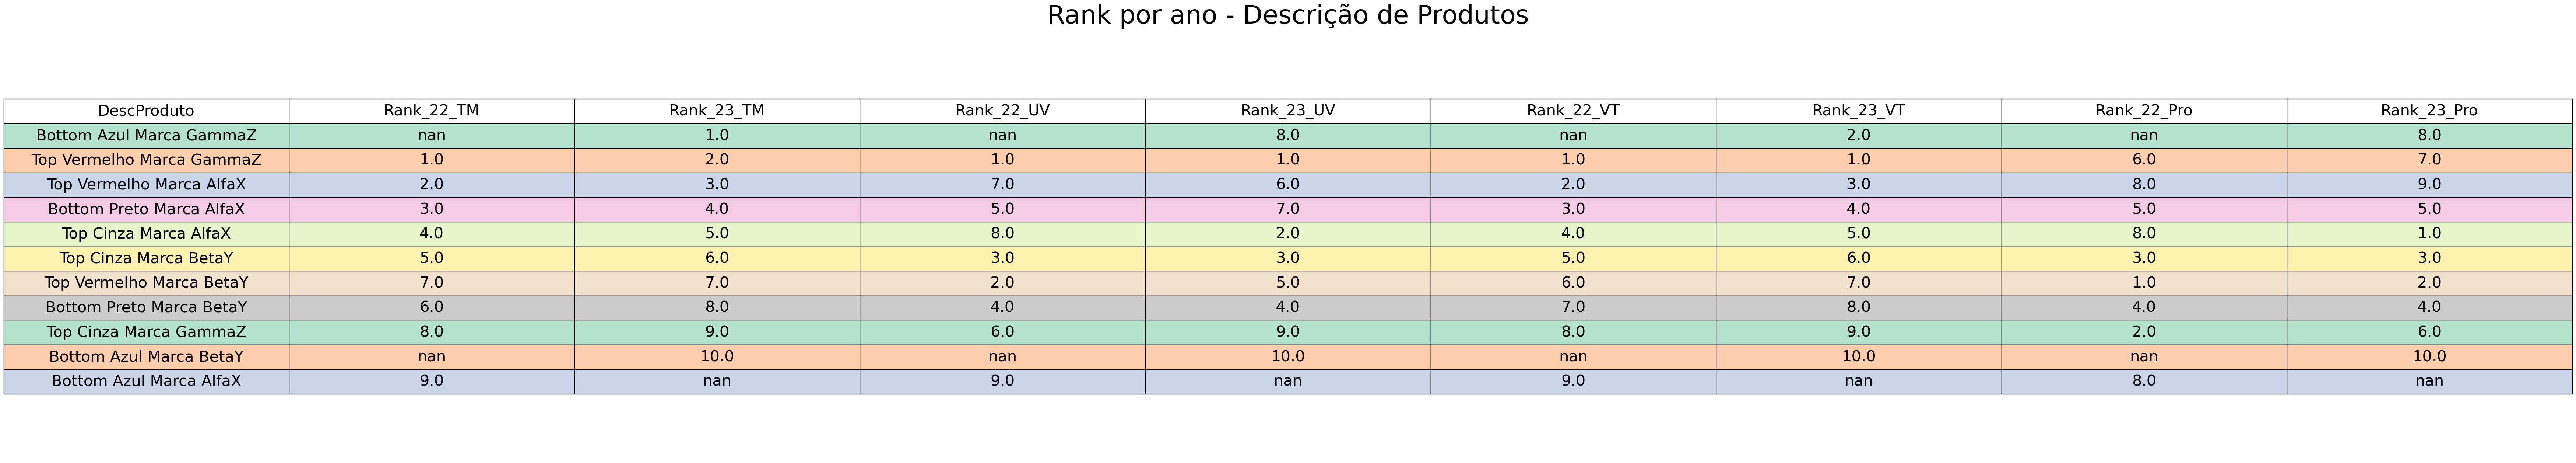

In [35]:
# Ajuste da coluna 'Descrição Produto'
def update_description(row):
    if row['Categoria'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Categoria'] + ' ' + row['Descrição Produto']
    if row['Cor'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Categoria'], row['Categoria'] + ' ' + row['Cor'])
    if 'Marca' not in row['Descrição Produto'] and row['Marca'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Marca'], 'Marca ' + row['Marca'])
    return row

df_p = df_p.apply(update_description, axis=1)
df_p.loc[df_p['ID_Produto'] == 123010, 'Descrição Produto'] = 'Bottom Azul Marca GammaZ'
df_p.loc[df_p['ID_Produto'] == 123011, 'Descrição Produto'] = 'Bottom Azul Marca BetaY'
df_tp = pd.merge(df_t, df_p, on='ID_Produto', how='left')
del df_t
df_tp_drp = df_tp.drop(columns=['ID_Trans', 'Data', 'ID_Loja', 'ID_Produto', 'ID_Cliente', 'Month'])
grouped_df = df_tp_drp.groupby(['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Year']).agg({'Ticket Médio': 'mean', 'UnidadesVendidas': 'sum', 'ValorTotal': 'sum', 'Promo': 'sum'}).reset_index()

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "UnidadesVendidas" em cada DataFrame
df1['Rank_2022_UnidadesVendidas'] = df1['UnidadesVendidas'].rank(ascending=False)
df2['Rank_2023_UnidadesVendidas'] = df2['UnidadesVendidas'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_UnidadesVendidas = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_UnidadesVendidas']], 
                                 df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_UnidadesVendidas']], 
                                 on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                                 how='outer')

# Classificar o DataFrame por 'Rank_2023_UnidadesVendidas'
rank_UnidadesVendidas = rank_UnidadesVendidas.sort_values('Rank_2023_UnidadesVendidas')

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "ValorTotal" em cada DataFrame
df1['Rank_2022_ValorTotal'] = df1['ValorTotal'].rank(ascending=False)
df2['Rank_2023_ValorTotal'] = df2['ValorTotal'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_ValorTotal = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_ValorTotal']], 
                           df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_ValorTotal']], 
                           on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                           how='outer')

# Classifique o DataFrame por "Rank_2023_ValorTotal
rank_ValorTotal = rank_ValorTotal.sort_values('Rank_2023_ValorTotal')

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "Promo" em cada DataFrame
df1['Rank_2022_Promo'] = df1['Promo'].rank(ascending=False)
df2['Rank_2023_Promo'] = df2['Promo'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_Promo = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_Promo']], 
                      df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_Promo']], 
                      on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                      how='outer')

# Classifique o DataFrame por 'Rank_2023_Promo'
rank_Promo = rank_Promo.sort_values('Rank_2023_Promo')

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "Ticket Médio" em cada DataFrame
df1['Rank_2022_Ticket_Medio'] = df1['Ticket Médio'].rank(ascending=False)
df2['Rank_2023_Ticket_Medio'] = df2['Ticket Médio'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_Ticket_Medio = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_Ticket_Medio']], 
                             df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_Ticket_Medio']], 
                             on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                             how='outer')

# Classifique o DataFrame por 'Rank_2023_Ticket_Medio'
rank_Ticket_Medio = rank_Ticket_Medio.sort_values('Rank_2023_Ticket_Medio')

# Eliminar as colunas "Categoria" e "Marca
rank_UnidadesVendidas = rank_UnidadesVendidas.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_ValorTotal = rank_ValorTotal.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_Promo = rank_Promo.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_Ticket_Medio = rank_Ticket_Medio.drop(['Categoria', 'Marca','Cor'], axis=1)

# Merge
merged_df = rank_UnidadesVendidas.merge(rank_ValorTotal, how='outer', on=['Descrição Produto'])
merged_df = merged_df.merge(rank_Promo, how='outer', on=['Descrição Produto'])
merged_df = merged_df.merge(rank_Ticket_Medio, how='outer', on=['Descrição Produto'])

# Ordenar por 'Rank_2023_Ticket_Medio'
merged_df = merged_df.sort_values(by='Rank_2023_Ticket_Medio')

cols = ['Descrição Produto', 'Rank_2022_Ticket_Medio', 'Rank_2023_Ticket_Medio'] + [col for col in merged_df.columns if col not in ['Descrição Produto', 'Rank_2022_Ticket_Medio', 'Rank_2023_Ticket_Medio']]
merged_df = merged_df[cols]

# Definir um dicionário para os nomes das novas colunas
new_column_names = {
    'Rank_2022_Ticket_Medio': 'Rank_22_TM',
    'Rank_2023_Ticket_Medio': 'Rank_23_TM',
    'Rank_2022_UnidadesVendidas': 'Rank_22_UV',
    'Rank_2023_UnidadesVendidas': 'Rank_23_UV',
    'Rank_2022_ValorTotal': 'Rank_22_VT',
    'Rank_2023_ValorTotal': 'Rank_23_VT',
    'Rank_2022_Promo': 'Rank_22_Pro',
    'Rank_2023_Promo': 'Rank_23_Pro',
    'Descrição Produto': 'DescProduto'
}

# Renomear as colunas
merged_df.rename(columns=new_column_names, inplace=True)

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(20, 15))

# Add a title to the plot
ax.set_title('Rank por ano - Descrição de Produtos', fontsize=50, pad=20)

# Adicionando a tabela à figura
# Reset the index and drop the old index
table_data = merged_df.reset_index(drop=True).round(2).values.tolist()
column_labels = merged_df.reset_index(drop=True).columns.tolist()


# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(30)

# Aumentando a largura e altura geral da tabela
table.scale(4.5, 4)  # Aumente o primeiro valor para aumentar a largura, e o segundo valor para aumentar a altura

# Aumentando o tamanho da fonte
table.set_fontsize(30)

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(30)

# Ajustando o tamanho da fonte da coluna 'DescProduto'
for key, cell in table.get_celld().items():
    if key[1] == 0:  # 0 é o índice da coluna 'DescProduto'
        cell.set_fontsize(30)  # Aumente este valor para tornar o texto maior
# Escondendo os eixos
ax.axis('off')

# Salvando a figura como .png
plt.savefig('merged_df_table.png')

###### - top 3 são destaques em Ticket Médio e Faturamento

___

In [36]:
# Criar DataFrame com colunas que contenham "2022"
df_2022 = merged_df.filter(regex='DesProduto|2022')
# Criar DataFrame com colunas que contenham "2023"
df_2023 = merged_df.filter(regex='DesProduto|2023')
# Agrupa por "Ano" e "Marca" e calcule a soma do "ValorTotal" e a média do "Ticket Médio".
df_Marca = df_tp.groupby(['Year', 'Marca']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()
# Agrupa por "Ano" e "Marca" e calcule a soma do "ValorTotal" e a média do "Ticket Médio".
df_Marca_ = df_tp.groupby(['Year', 'Marca']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()


In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crie um subplot com 1 linha e 2 colunas, com títulos para espaçamento
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Defina cores para cada ano
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Obtenha os anos únicos
years = df_Marca['Year'].unique()

# Para cada ano
for i, year in enumerate(years):
    # Filtra o DataFrame para o ano atual
    df_year = df_Marca[df_Marca['Year'] == year]

    # Crie um gráfico de barras para 'Ticket Médio'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Crie um gráfico de barras para 'ValorTotal'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Atualize as propriedades do eixo x e y
fig.update_xaxes(title_text="Marca", row=1, col=1)
fig.update_xaxes(title_text="Marca", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

# Atualize o layout para agrupar barras em vez de empilhar, aumentar a largura da figura e ajustar o espaçamento do subplot
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Mostre a figura
fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure4.png')

###### - GammaZ ultrapassa AlfaX em faturamento em 2023

___

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))


colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}


years = df_Marca_['Year'].unique()


for i, year in enumerate(years):
    
    df_year = df_Marca_[df_Marca_['Year'] == year]

    
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)


fig.update_xaxes(title_text="Marca", row=1, col=1)
fig.update_xaxes(title_text="Marca", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)


fig.update_layout(barmode='group', width=1200, margin=dict(b=100))


fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure5.png')

###### - GammaZ ultrapassa AlfaX em vendas em 2023

___

In [39]:
df_Cor = df_tp.groupby(['Year', 'Cor']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

df_Cor_ = df_tp.groupby(['Year', 'Cor']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()

import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))


colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}


years = df_Cor['Year'].unique()


for i, year in enumerate(years):
    
    df_year = df_Cor[df_Cor['Year'] == year]

   
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)


fig.update_xaxes(title_text="Cor", row=1, col=1)
fig.update_xaxes(title_text="Cor", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)


fig.update_layout(barmode='group', width=1200, margin=dict(b=100))


fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure6.png')

###### - vermelho é sempre destaque
###### - Azul tem desempenho muito forte em 2023, se recuperando em faturamento, mas principalemnte em Ticket Médio

___

In [40]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Cor_['Year'].unique()


for i, year in enumerate(years):
    
    df_year = df_Cor_[df_Cor_['Year'] == year]
    
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)
    
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Cor", row=1, col=1)
fig.update_xaxes(title_text="Cor", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure7.png')

###### - vermelho é sempre destaque em vendas
###### - Azul tem promoções em 2023

___

In [41]:
df_Categoria = df_tp.groupby(['Year', 'Categoria']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

df_Categoria_ = df_tp.groupby(['Year', 'Categoria']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Categoria['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Categoria[df_Categoria['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Categoria", row=1, col=1)
fig.update_xaxes(title_text="Categoria", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure8.png')

###### - Top fatura mais, mas Bottom melhora Ticket médio em 2023

___

In [42]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Categoria_['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Categoria_[df_Categoria_['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)
    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Categoria", row=1, col=1)
fig.update_xaxes(title_text="Categoria", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure9.png')

In [43]:
df_Descrição_Produto = df_tp.groupby(['Year', 'Descrição Produto']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()
df_Descrição_Produto_ = df_tp.groupby(['Year', 'Descrição Produto']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()

In [44]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Descrição_Produto['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Descrição_Produto[df_Descrição_Produto['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Descrição Produto", row=1, col=1)
fig.update_xaxes(title_text="Descrição Produto", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

fig.show()


# Save the figure as a .png file
pio.write_image(fig, 'figure10.png')

###### - Ticket Médio e faturamento - destaques Top Vermelho e Bottom Azul GammaZ

___

In [45]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Descrição_Produto_['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Descrição_Produto_[df_Descrição_Produto_['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)
    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Descrição Produto", row=1, col=1)
fig.update_xaxes(title_text="Descrição Produto", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

fig.show()


# Save the figure as a .png file
pio.write_image(fig, 'figure11.png')

___

In [46]:
def create_plot_for_brand(brand):
    # Obter produtos e anos exclusivos para a marca
    products = df_tp[df_tp['Marca'] == brand]['Descrição Produto'].unique()
    years = sorted(df_tp[df_tp['Marca'] == brand]['Year'].unique())

    # color sequence
    colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

    # dicionário para mapear anos a cores
    year_color = {year: colors[i % len(colors)] for i, year in enumerate(years)}

    # dicionários para armazenar a média de "Ticket Médio" e somar "UnidadesVendidas", "ValorTotal" e "Promo" para cada produto e ano
    ticket_medio_means = {year: {} for year in years}
    unidades_vendidas_sums = {year: {} for year in years}
    valor_total_sums = {year: {} for year in years}
    promo_sums = {year: {} for year in years}

    fig = go.Figure()
    for year in years:
        for product in products:
            # Filtrar DataFrame por produto e ano
            df_product_year = df_tp[(df_tp['Marca'] == brand) & (df_tp['Descrição Produto'] == product) & (df_tp['Year'] == year)]

            # média de "Ticket Médio" e a soma de "UnidadesVendidas", "ValorTotal" e "Promo".
            ticket_medio_mean = df_product_year['Ticket Médio'].mean()
            unidades_vendidas_sum = df_product_year['UnidadesVendidas'].sum()
            valor_total_sum = df_product_year['ValorTotal'].sum()
            promo_sum = df_product_year['Promo'].sum()

            # Armazena esses valores nos dicionários
            ticket_medio_means[year][product] = ticket_medio_mean
            unidades_vendidas_sums[year][product] = unidades_vendidas_sum
            valor_total_sums[year][product] = valor_total_sum
            promo_sums[year][product] = promo_sum

        # Adicionar uma barra ou linha ao gráfico, dependendo do ano
        if year == 2022:
            fig.add_trace(go.Bar(x=products, y=[ticket_medio_means[year][product] for product in products], name=f'{year}', marker_color=year_color[year],
                                 hovertemplate='Ticket Médio: %{y:.2f}<br>Unidades Vendidas: %{customdata[0]:.2f}<br>Valor Total: %{customdata[1]:.2f}<br>Promo: %{customdata[2]:.2f}<extra></extra>',
                                 customdata=[[unidades_vendidas_sums[year][product], valor_total_sums[year][product], promo_sums[year][product]] for product in products]))
        elif year == 2023:
            # Calcule a variação percentual de 2022 a 2023 para cada produto
            percent_variations = [(ticket_medio_means[year][product] / ticket_medio_means[2022][product] - 1) * 100 for product in products]

            fig.add_trace(go.Scatter(x=products, y=[ticket_medio_means[year][product] for product in products], mode='lines', name=f'{year}', line=dict(color=year_color[year]),
                                     hovertemplate='Ticket Médio: %{y:.2f}<br>Variation from 2022: %{customdata[0]:.2f}%<br>Unidades Vendidas: %{customdata[1]:.2f}<br>Valor Total: %{customdata[2]:.2f}<br>Promo: %{customdata[3]:.2f}<extra></extra>',
                                     customdata=[[percent_variations[i], unidades_vendidas_sums[year][product], valor_total_sums[year][product], promo_sums[year][product]] for i, product in enumerate(products)]))

    # layout
    fig.update_layout(
        height=600, 
        width=900, 
        title_text=f"Ticket Médio for {brand}", 
        xaxis_title="Descrição Produto", 
        yaxis_title="Ticket Médio", 
        barmode='group',
        xaxis_tickangle=-90
    )

  
    fig.show()
    


brands = df_tp['Marca'].unique()

for brand in brands:
    create_plot_for_brand(brand)

# Save the figure as a .png file
pio.write_image(fig, 'figure12.png')

___

In [47]:
# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_tp':
        del variables[var_name]

##### Terceira parte da análise:
- Clientes e Lojas

###### nesta terceira parte da análise é possível verificar que:

- As lojas 5 (SP), 8 (RS) e 2 (MG) foram as que melhor performaram em relação a Ticket Médio no ano de 2023
- Para estas lojas a Classe B é a com maior Ticket Médio no ano de 2023 e o sexo feminino se destaca neste quesito
- nas faixas etárias há um diferença entre as lojas quando se trata de Ticket Médio no ano de 2023
- - loja 5 -> 18-25
- - loja 8 -> 25-35
- - loja 2 -> 45+
- as tabelas trazem detalhes que podem auxiliar em decisões futuras de MKT de froma mais detalhada
- A primeira loja da tabela é a primeira do Rank (ordenado por Ticket Médio 2023); e assim por diante

In [48]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Cliente']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_c = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_c.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_c[col]):
        # Remova os espaços em branco no início e no final
        df_c[col] = df_c[col].str.strip()

In [49]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Lojas']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_l = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_l.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_l[col]):
        # Remova os espaços em branco no início e no final
        df_l[col] = df_l[col].str.strip()

In [50]:
# If 'Regiao' is None and 'UF' is 'SP', set 'Regiao' to 'SUDESTE'
df_l.loc[(df_l['Regiao'].isnull()) & (df_l['UF'] == 'SP'), 'Regiao'] = 'SUDESTE'
# If 'Regiao' is None and 'UF' is 'BH', set 'Regiao' to 'SUDESTE'
df_l.loc[(df_l['Regiao'].isnull()) & (df_l['UF'] == 'BH'), 'Regiao'] = 'SUDESTE'
df_merged = df_tp.merge(df_l, on='ID_Loja', how='left')
df_final = df_merged.merge(df_c, left_on='ID_Cliente', right_on='CustomerID', how='left')

# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_final':
        del variables[var_name]

Ticket Médio por ID_Loja e Ano - a barra em vermelho indica a Loja 5 com melhor Ticket Médio agregado no ano 2023 (agregado de todos os produtos)

In [51]:
# Group by 'ID_Loja' and 'Year' and calculate the mean of 'Ticket Médio', 'ValorTotal', and 'UnidadesVendidas'
df_grouped = df_final.groupby(['ID_Loja', 'Year']).agg({'Ticket Médio': 'mean', 'ValorTotal': 'sum', 'UnidadesVendidas': 'sum'})

# Rank 'ID_Loja' by 'Ticket Médio', 'ValorTotal', and 'UnidadesVendidas' for each year
df_grouped['Rank_Ticket_Medio'] = df_grouped.groupby('Year')['Ticket Médio'].rank(ascending=False)
df_grouped['Rank_ValorTotal'] = df_grouped.groupby('Year')['ValorTotal'].rank(ascending=False)
df_grouped['Rank_UnidadesVendidas'] = df_grouped.groupby('Year')['UnidadesVendidas'].rank(ascending=False)
# Sort df_grouped by 'ID_Loja', 'Year' and 'Rank_Ticket_Medio'
df_sorted = df_grouped.sort_values(by=['ID_Loja', 'Rank_Ticket_Medio', 'Year'])


import plotly.graph_objects as go

# Reset the index
df_sorted_reset = df_sorted.reset_index()

# Create a color sequence similar to 'Pastel2'
color_sequence = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae']

# Get the 'ID_Loja' with the best rank in 2023
best_rank_id_loja_2023 = df_sorted_reset[(df_sorted_reset['Year'] == 2023) & (df_sorted_reset['Rank_Ticket_Medio'] == df_sorted_reset['Rank_Ticket_Medio'].min())]['ID_Loja'].values[0]

# Create a bar plot
fig = go.Figure()

for i, year in enumerate(df_sorted_reset['Year'].unique()):
    df_year = df_sorted_reset[df_sorted_reset['Year'] == year]
    fig.add_trace(go.Bar(
        x=df_year['ID_Loja'],
        y=df_year['Ticket Médio'],
        name=str(year),
        text=df_year['Rank_Ticket_Medio'],
        legendgroup=str(year),
        marker_color=[color_sequence[i % len(color_sequence)] if id_loja != best_rank_id_loja_2023 or year != 2023 else '#ff0000' for id_loja in df_year['ID_Loja']],  # Highlight the best rank in 2023
        hovertemplate='ID_Loja: %{x}<br>Ticket Médio: %{y}<br>Year: '+str(year)+'<br>Rank: %{text}<extra></extra>',
    ))

# Add title and set barmode to 'group'
fig.update_layout(title_text='Ticket Médio por ID_Loja e Ano', barmode='group')

# Show the plot
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure14.png')


___

In [52]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','Marca']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'Marca'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')
#df_pivot_reindexed

- Loja e Marca - Rank por Ticket médio 2023

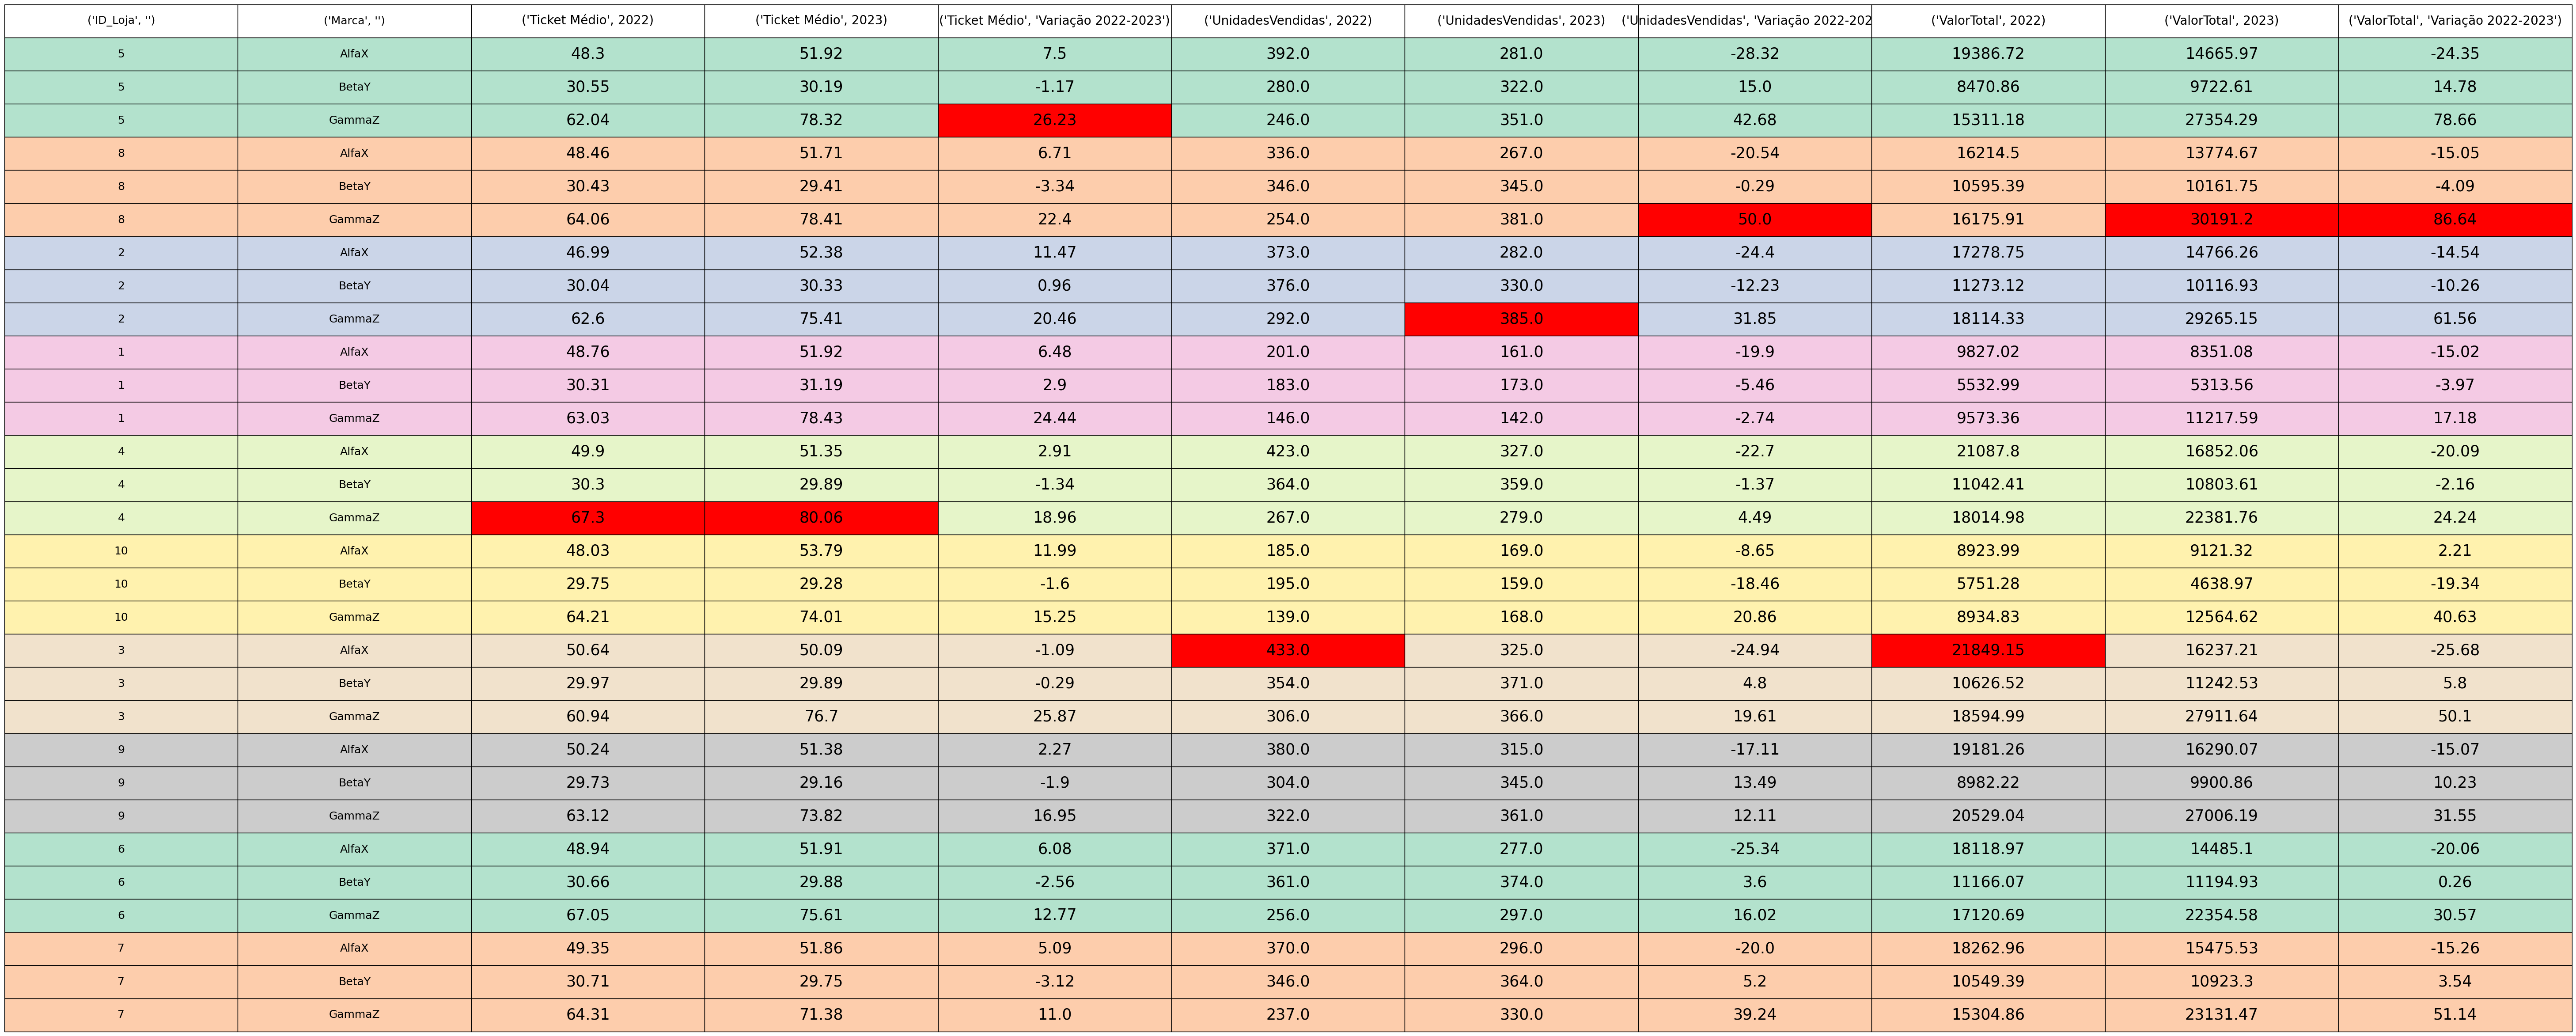

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define the colors
cmap = cm.get_cmap('Pastel2')  # Get the 'Pastel2' colormap
colors = [cmap(i) for i in range(cmap.N)]  # Generate colors from the colormap


# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'Marca' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')

___

- Loja e UF - Rank por Ticket médio 2023

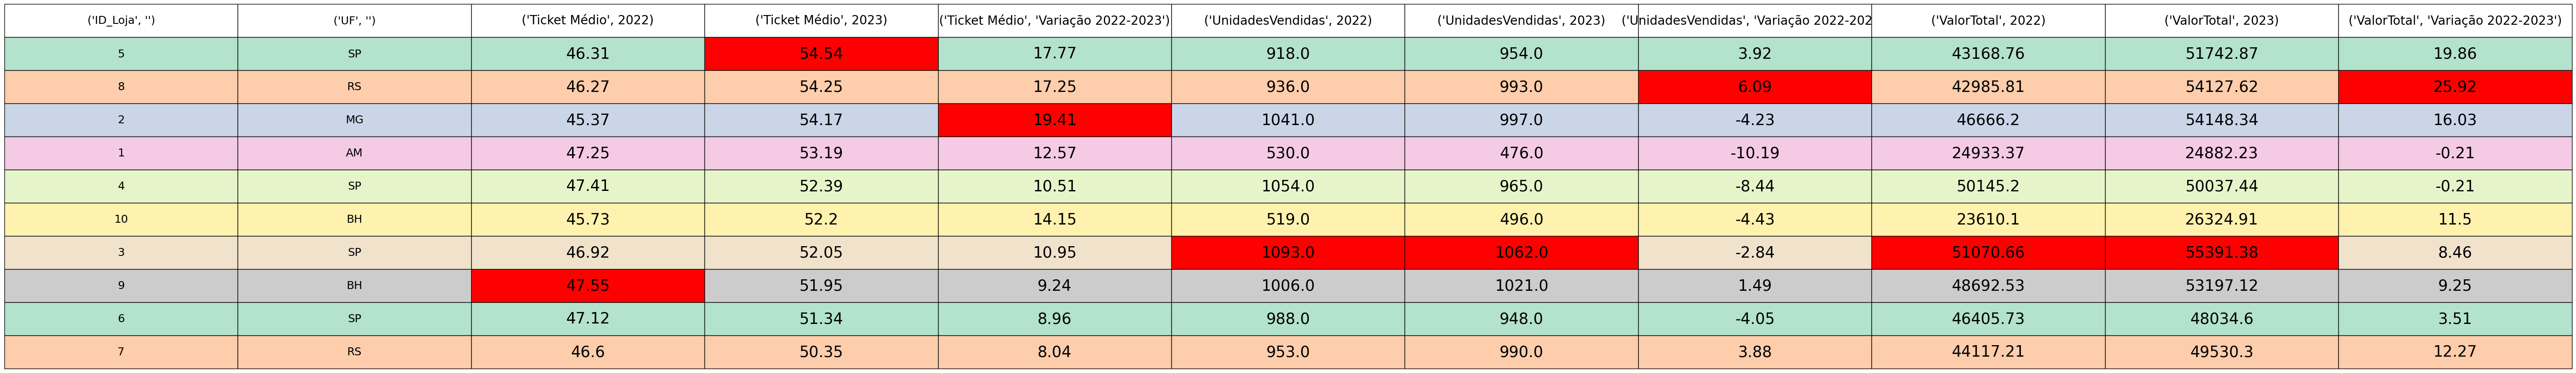

In [54]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','UF']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'UF'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'UF' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



___

- Loja e Classe Social - Rank por Ticket médio 2023

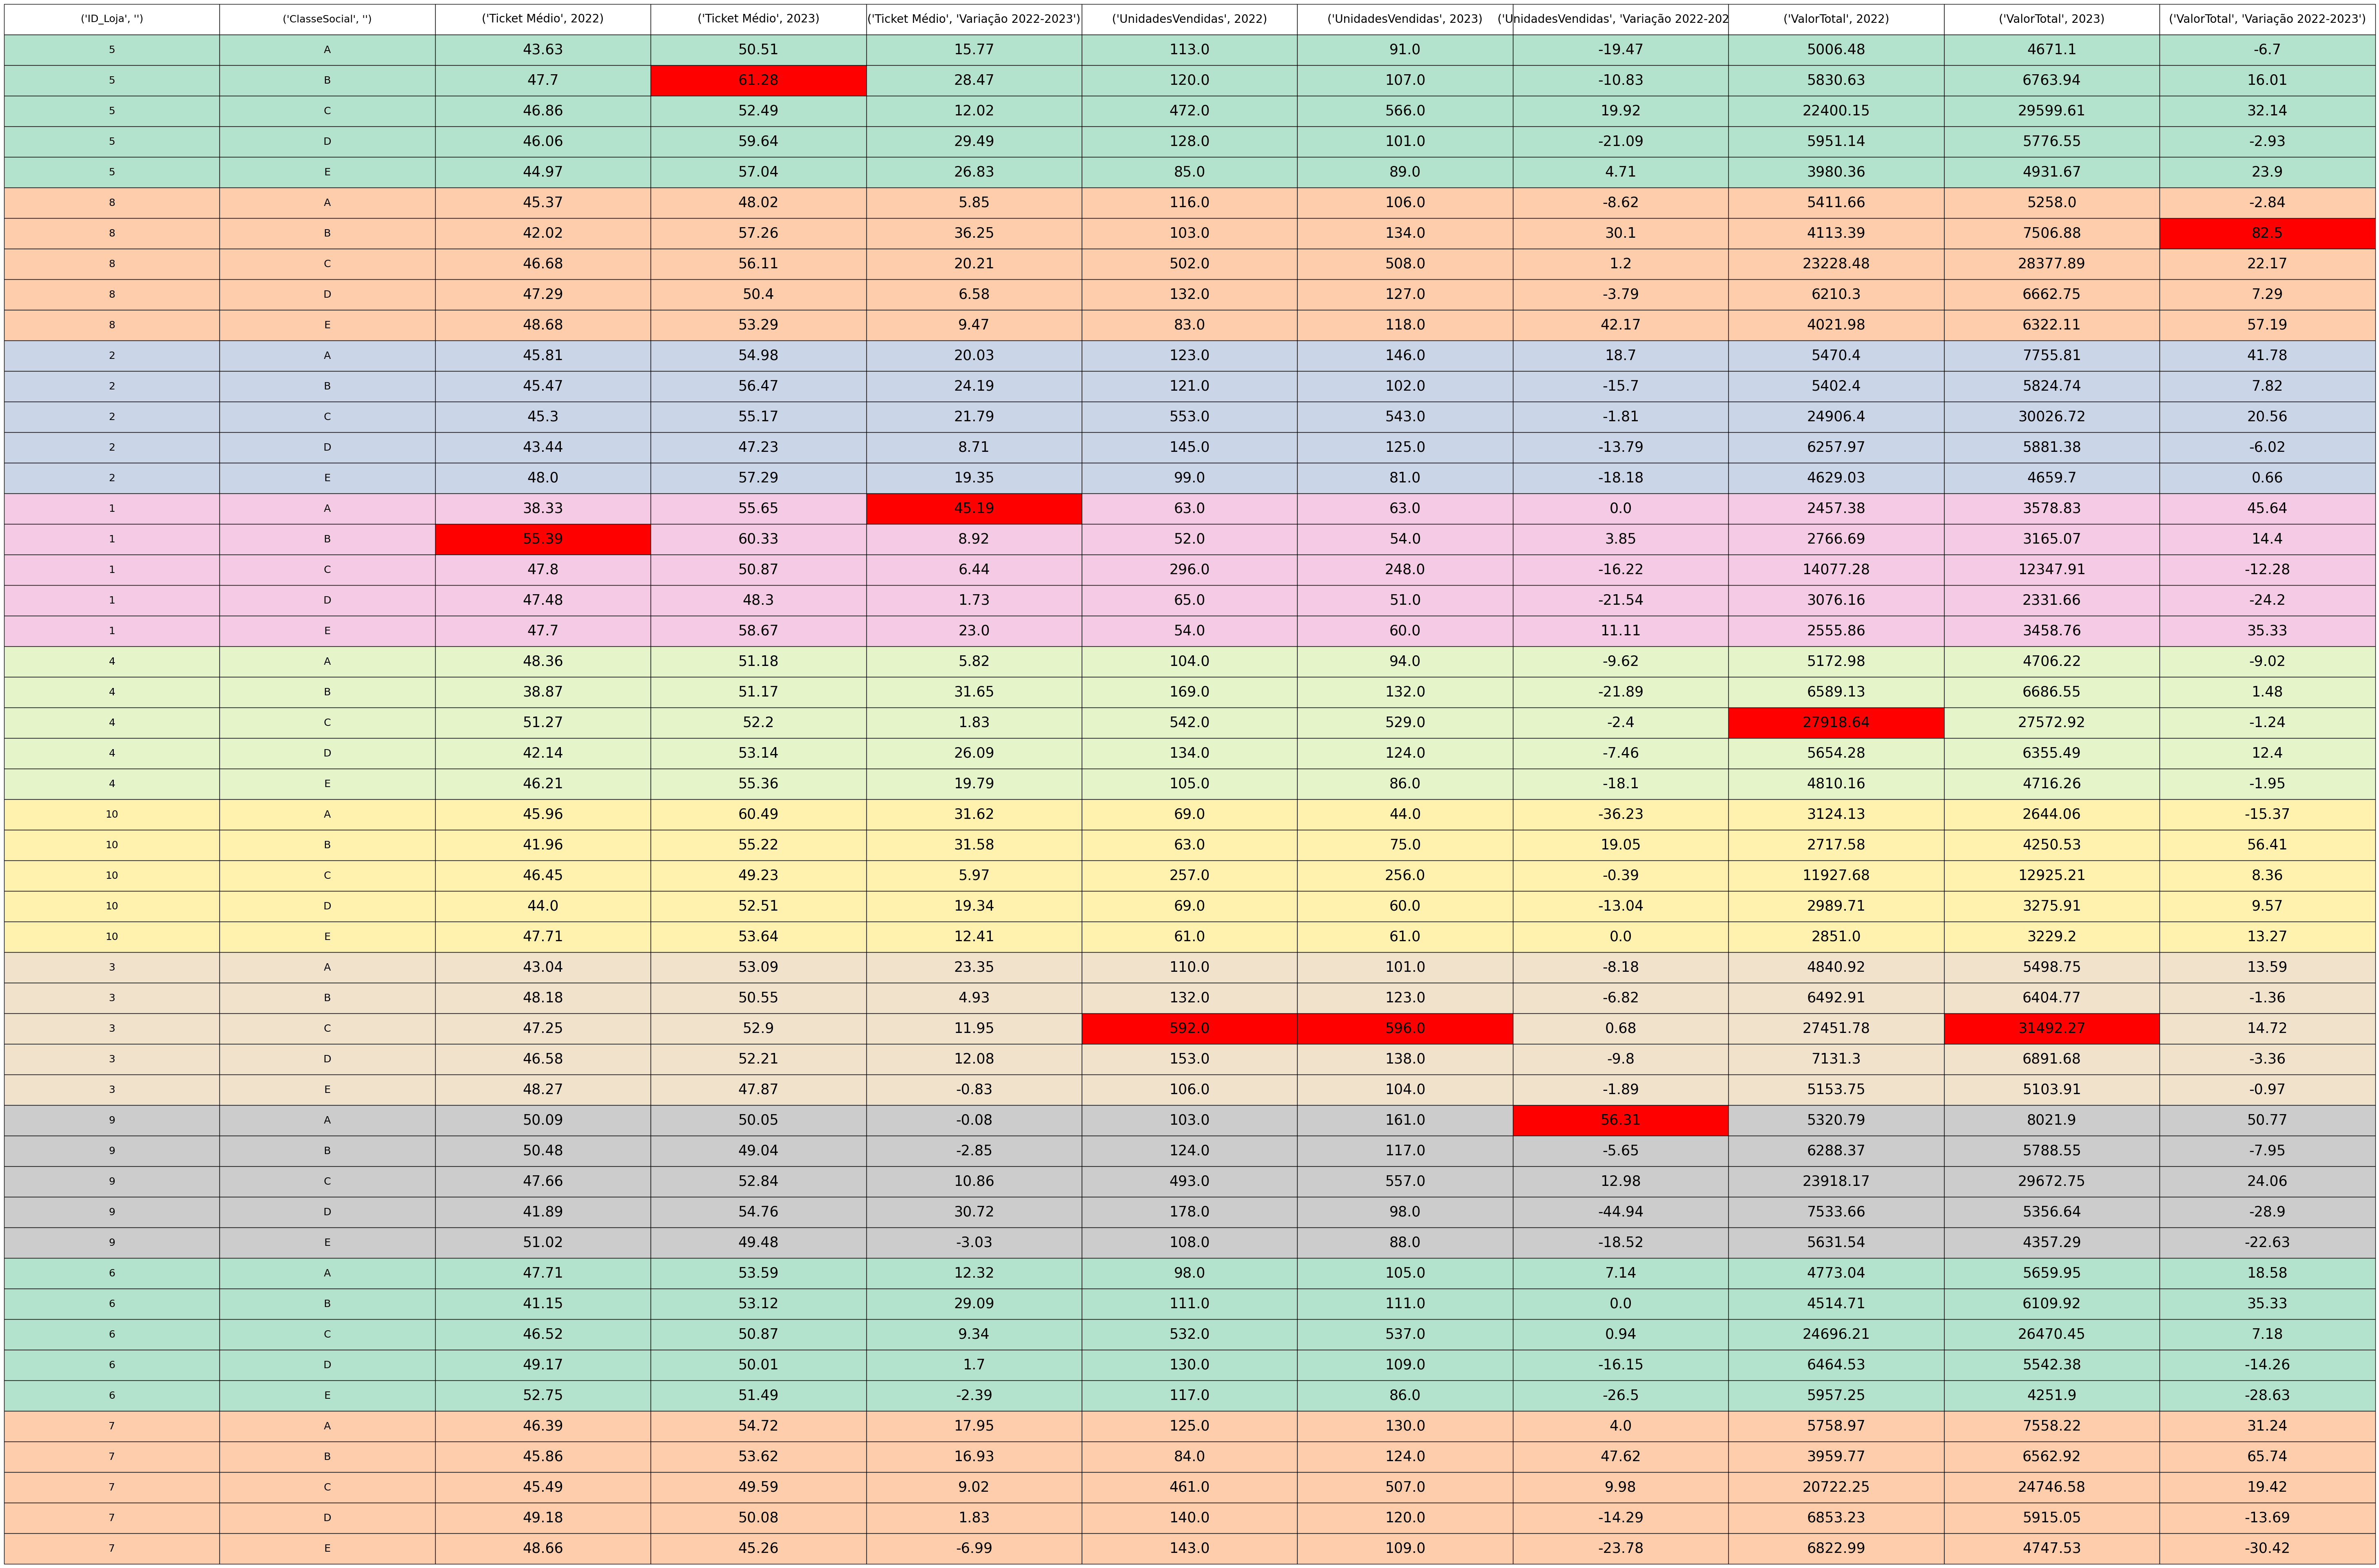

In [55]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','ClasseSocial']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'ClasseSocial'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'ClasseSocial' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



___

- Loja e Genero - Rank por Ticket médio 2023

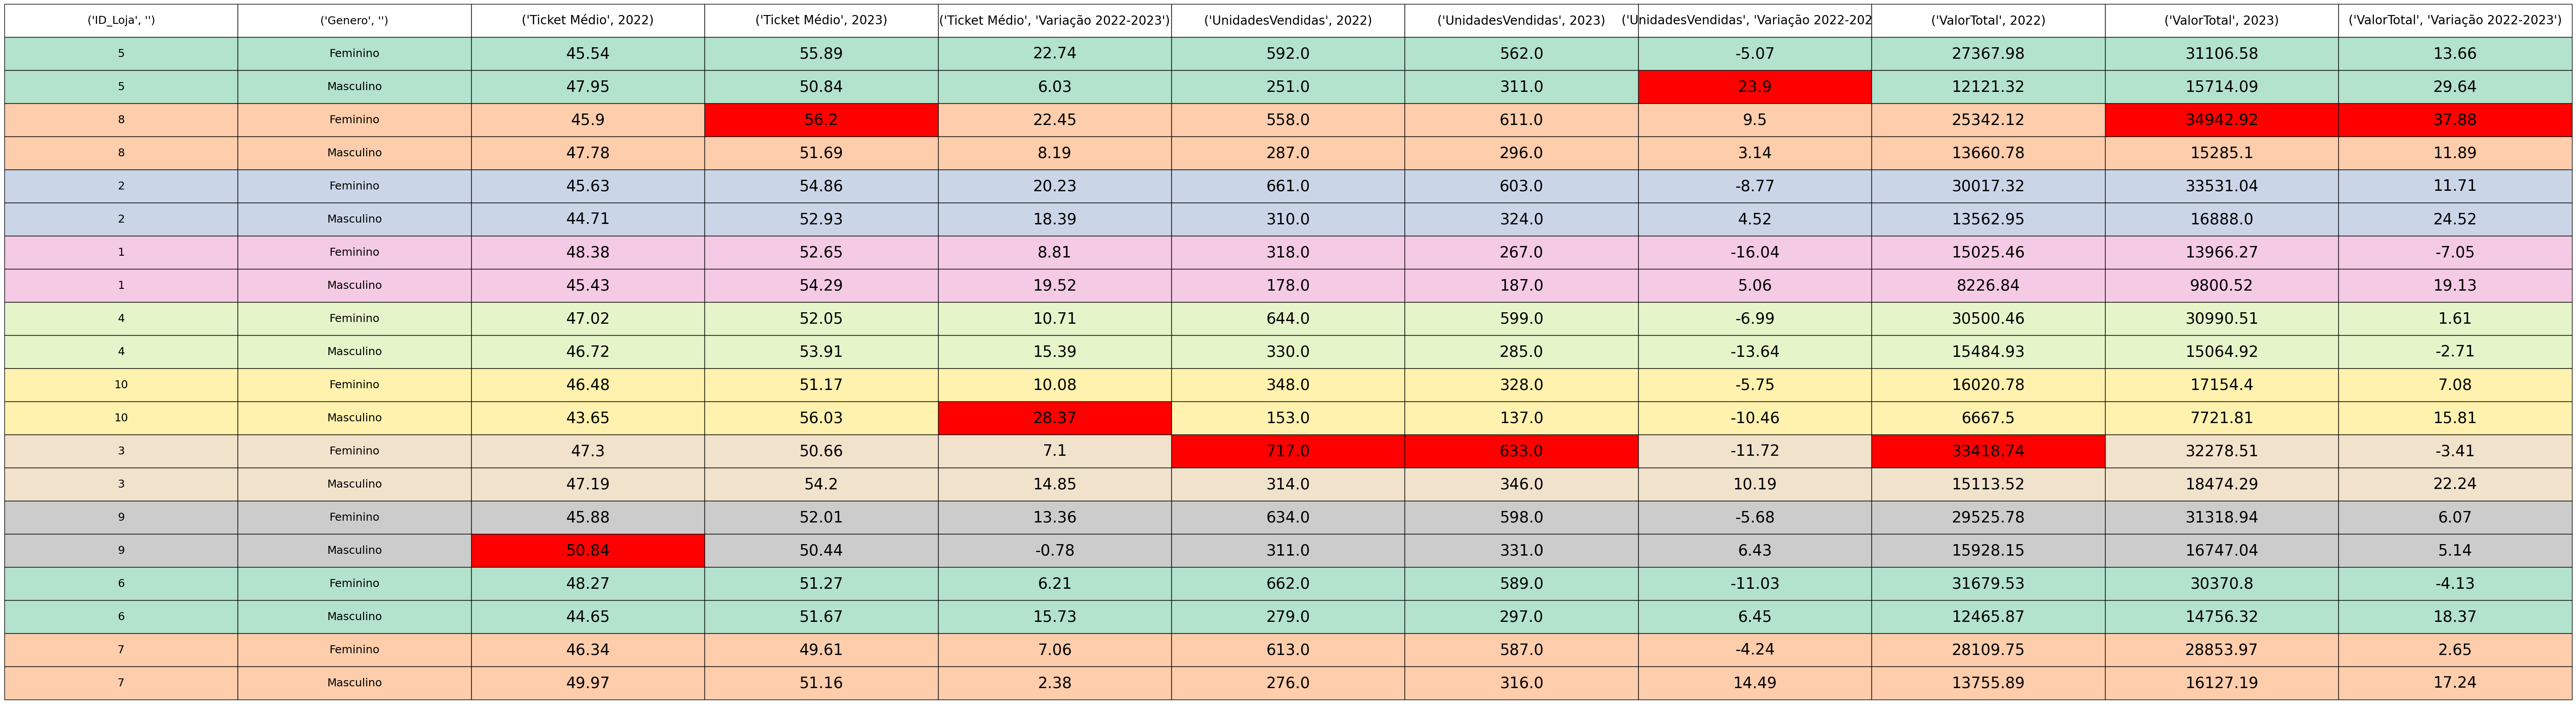

In [56]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','Genero']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'Genero'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'Genero' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



___

- Loja e Faixa de Idade - Rank por Ticket médio 2023

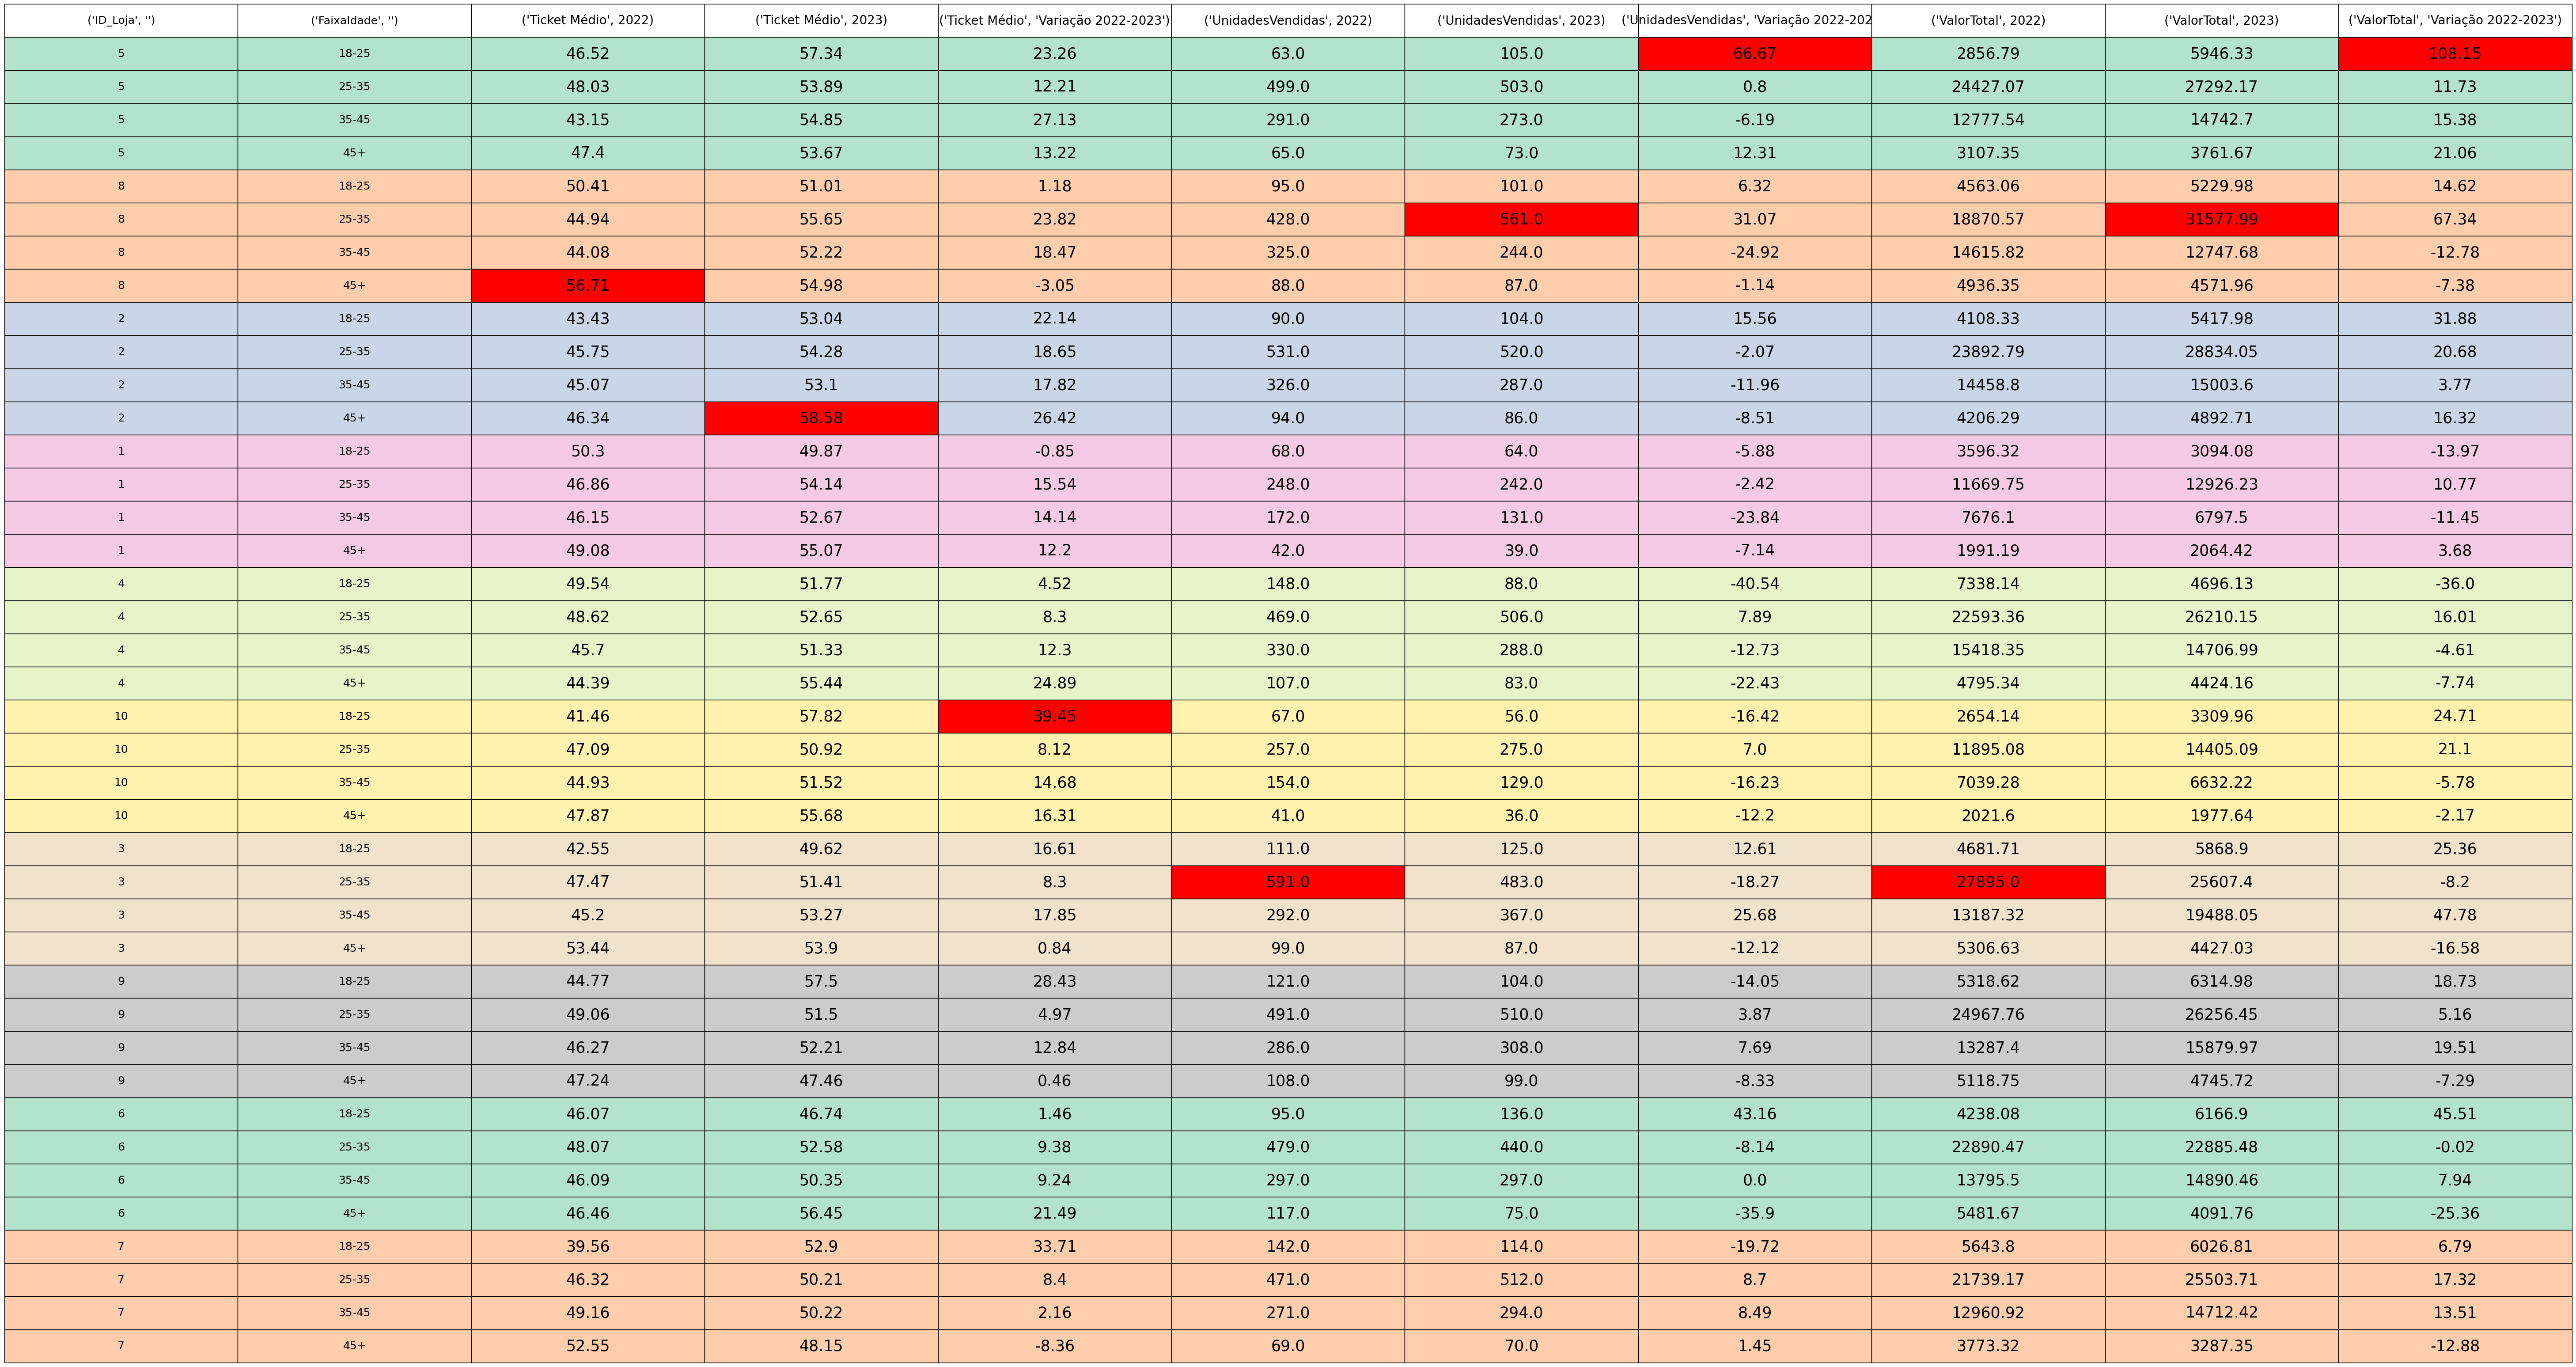

In [57]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','FaixaIdade']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'FaixaIdade'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'FaixaIdade' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



In [58]:
# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_final':
        del variables[var_name]

##### Quarta parte da análise:
- Teste

###### nesta quarta parte da análise é possível verificar que:
O valor de p é 0,185 ou 18,5%. Um valor de p menor que 0,05 geralmente é considerado evidência forte o suficiente para rejeitar a hipótese nula e aceitar a hipótese alternativa.

- H0 (Hipótese nula): O teste não rejeita a hipótese nula pois não há associação significativa entre "Grupo" e "Comprou". Em outras palavras, a taxa de compra é praticamente a mesma para os grupos 'CONTROLE' e 'TESTE'.

- H1 (Hipótese alternativa): O Teste rejeita hipótese alternativa que seria uma associação significativa entre "Grupo" e "Comprou".

Portanto não houve diferença significativa entre o Modelo ANTIGO e NOVO de disparo de e-mails.



In [60]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Cliente']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_c = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_c.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_c[col]):
        # Remova os espaços em branco no início e no final
        df_c[col] = df_c[col].str.strip()

In [62]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Teste
ws = wb['Teste']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_tst = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_tst.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_tst[col]):
        # Remova os espaços em branco no início e no final
        df_tst[col] = df_tst[col].str.strip()

In [63]:
df_c = df_c.dropna(axis=1, how='all')

In [64]:
non_conforming_rows = df_tst.loc[
    ((df_tst['Enviado'] == 0) & (df_tst['Aberto'] != 0)) |
    ((df_tst['Enviado'] == 0) & (df_tst['Sessao'] != 0)) |
    ((df_tst['Recebido'] == 0) & (df_tst['Aberto'] != 0)) |
    ((df_tst['Aberto'] == 0) & (df_tst['Sessao'] != 0))
]

In [65]:
df_tst = df_tst.drop(non_conforming_rows.index)
df_merged = df_tst.merge(df_c, on='CustomerID', how='left')

In [66]:
# Group by 'Grupo' and calculate the mean of 'Comprou'
conversion_rate = df_merged.groupby('Grupo')['Comprou'].mean()

# Reset the index of the conversion_rate Series to convert it into a DataFrame
cr = conversion_rate.reset_index()

# Rename the columns
cr.columns = ['Grupo', 'conversion_rate']
# Group by 'Grupo' and calculate the mean of 'Aberto'
opening_rate = df_merged.groupby('Grupo')['Aberto'].mean()

o_r = opening_rate.reset_index()

# Rename the columns
o_r.columns = ['Grupo', 'opening_rate']
#o_r
# Assuming o_r is a DataFrame with a 'Grupo' column
merged_df = cr.merge(o_r, on='Grupo')
merged_df['conversion_rate'] = ((merged_df['conversion_rate'] * 100).round(2)).astype(str) + '%'
merged_df['opening_rate'] = ((merged_df['opening_rate'] * 100).round(2)).astype(str) + '%'

merged_df

Grupo conversion_rate opening_rate
0  CONTROLE          58.49%       86.79%
1     TESTE          73.33%       91.11%

In [67]:
import statsmodels.api as sm
from scipy import stats

# Criando a tabela de contingência
tabela_contingencia = pd.crosstab(df_merged['Grupo'], df_merged['Comprou'])

# Realizando o teste
chi2, p, df, expected = stats.chi2_contingency(tabela_contingencia)

# Imprimindo os resultados
print("Valor de p:", p)

# Se p < 0.05, há significância estatística
if p < 0.05:
    print("Existe relação significativa entre Grupo e Comprou")
else:
    print("Não há relação significativa entre Grupo e Comprou")


Valor de p: 0.1850463335809991
Não há relação significativa entre Grupo e Comprou


___

### Próximos Passos

- testar a capacidade dos dados em identificar tendências, sazonalidade e predições utlizando o algoritmo PROPHET para a timeseries Data e dados de vendas para melhor interpretar o calendário e seus momentos importantes para o varejo de roupas
- outros dados externos podem auxiliar nos modelos (Bureau de Dados, IBGE, Ministérios,...)
- dados de concorrência

##### sobre a análise

- vale manter as estratégias em relação a peças vermelhas. Estão bem consolidadas nas preferências dos clientes.
- na possibilidade de promoção de outros produtos Azul pode ser uma cor interessante
- as estratégias de MKT precisam ser renovadas. 
    - as promoções não teem surtido efeito
    - a NOVA estratégia de email marketing também não se mostrou significativa 

In [68]:
import os

#os.system('jupyter nbconvert --no-input --to html crm_v5_1.ipynb')